# B3: SWAP Qubits  

## Problem Statement  

Implement the operation of swapping two qubit states on a quantum circuit $ qc $ with **2 qubits**.  

More precisely, implement the transformation:  

$$  
a_0 |00\rangle + a_1 |10\rangle + a_2 |01\rangle + a_3 |11\rangle  
\quad \xrightarrow{qc} \quad  
a_0 |00\rangle + a_2 |10\rangle + a_1 |01\rangle + a_3 |11\rangle,  
$$  

where $ a_i $ represents arbitrary probability amplitudes.  

## Constraints  

- You **cannot** use Qiskit's `SwapGate`.  
- Global phase is ignored in the judge.  


In [ ]:
from qiskit import QuantumCircuit

def solve() -> QuantumCircuit:
    qc = QuantumCircuit(2)
    
    qc.swap(qubit1=0, qubit2=1)

    return qc

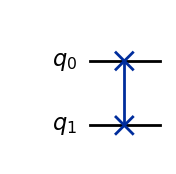

In [3]:
qc = solve()

qc.draw('mpl')

- In this way we can implement swap gate. But there is a constraint that we cannot use the swap gate directly. Lets try another way.

In [5]:
from qiskit import QuantumCircuit

def solve() -> QuantumCircuit:
    qc = QuantumCircuit(2)
    
    qc.cx(control_qubit=0, target_qubit=1)
    qc.cx(control_qubit=1, target_qubit=0)
    qc.cx(control_qubit=0, target_qubit=1)

    return qc

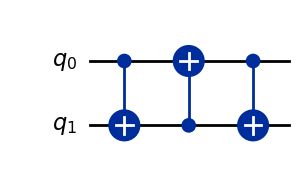

In [6]:
qc = solve()

qc.draw('mpl')

## Solution Approach  

To swap the states of two qubits without using Qiskit's `SwapGate`, we use a sequence of **CNOT (CX) gates**. The standard decomposition of a **SWAP gate** using CNOT gates is as follows:  

### Step 1: **Apply the First CNOT ($ CX(0,1) $)**  
- This **copies** the state of qubit $ q_0 $ onto $ q_1 $, but does not erase $ q_0 $.  
- Effectively, the target qubit ($ q_1 $) becomes an **XOR** of both qubits.  

### Step 2: **Apply the Second CNOT ($ CX(1,0) $)**  
- This updates the control qubit ($ q_0 $) based on the modified $ q_1 $.  
- Now, $ q_0 $ has the original value of $ q_1 $, completing half of the swap.  

### Step 3: **Apply the Third CNOT ($ CX(0,1) $)**  
- Finally, applying $ CX(0,1) $ again restores the state of $ q_1 $ to its original value, completing the swap operation.  

## Justification  

The sequence of operations ensures that the computational basis states are transformed correctly:  

1. **Initial State**  
   $$ |q_0 q_1\rangle = |x y\rangle $$  

2. **After First CNOT ($ CX(0,1) $)**  
   $$ |x, x \oplus y\rangle $$  

3. **After Second CNOT ($ CX(1,0) $)**  
   $$ |y, x \oplus y\rangle $$  

4. **After Third CNOT ($ CX(0,1) $)**  
   $$ |y, x\rangle $$  

Thus, the states of the two qubits have been swapped correctly. This method is widely used in quantum computing as an efficient decomposition of the **SWAP gate**.
